## <h1 align="center">Actividad: Agrupar datos textuales con el Modelo de Tópicos y el algoritmo Latent Dirichlet Allocation (LDA)</h3>

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta actividad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
    <li>Biblioteca <a href="http://scikit-learn.org/stable/install.html/">SciKit-learn</a> de Python</li>
    <li>Código disponible en  <a href="https://github.com/lda-project/lda/">lda-project</a></li>
    <li>Material elaborado por el Prof. Matthieu Vernier</li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.7.3. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.)
</p>
</div>

In [1]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]



<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en  explorar la estructura oculta de un conjunto de datos textuales.</p>
<p> Comenzaremos por utilizar un  algoritmo de clustering tradicional como Kmeans para explorar datos textuales, considerando la medida tf-idf por cada término presente en cada texto, para caracterizar los textos y construir distancias entre ellos.</p>
<p>En una segunda fase utilizaremos el <a href="https://drive.google.com/open?id=1rSQPJvRVj0V_IChzspQMRPNwlDTkHYHp"> Modelo Probabilista De Tópicos </a> para descubrir tópicos en los textos. Para ello se utilizará el algoritmo de asignación de tópicos latentes conocido como <a href= "https://drive.google.com/open?id=1BobImO3192hifZPLXowd14gryVAUzBPW">Latent Dirichlet Allocation (LDA)</a>. El enfoque es probabilista, por lo que el resultado del algoritmo es descubrir tópicos en los textos (el número de tópicos es definido por el analista) y asignar una distribución de probabilidad de tópicos en cada texto.</p>  Dependiendo del tamaño de los textos, es también posible agruparlos de acuerdo al tópico con mayor representación en cada uno, lo que permitirá comparar esta metodología con los algoritmos de clustering clásicos.</p> </div>
    
  

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<p>Utilizaremos las 100 primeras noticias de un conjunto de datos provenientes del periódico El Dinamo.</p>   
<p>El primer paso es la lectura de datos: </p></div>

In [2]:
import pandas as pd
#from pandasql import sqldf #para utilizar una síntaxis SQL para consultar nuestros datos

dataset="dataset_eldinamo_13122019.csv"
df = pd.read_csv(dataset)
df[:5]

,url,date,text
0,https://www.eldinamo.cl/nacional/2019/12/13/mo...,13 de Diciembre de 2019,El ministro de Vivienda Cristián Monckeberg ...
1,https://www.eldinamo.cl/nacional/2019/12/13/go...,13 de Diciembre de 2019,La Moneda informó que Sebastián Piñera decretó...
2,https://www.eldinamo.cl/nacional/2019/12/13/co...,13 de Diciembre de 2019,La Corte de apelaciones de Santiago declaró ad...
3,https://www.eldinamo.cl/nacional/2019/12/13/in...,13 de Diciembre de 2019,Luego que durante esta mañana la Organización ...
4,https://www.eldinamo.cl/nacional/2019/12/13/in...,13 de Diciembre de 2019,Tras varias semanas de espera la misión de ob...


In [3]:
noticias = df[:100].text
len(noticias)
noticias[:10]

0    El ministro de Vivienda  Cristián Monckeberg  ...
1    La Moneda informó que Sebastián Piñera decretó...
2    La Corte de apelaciones de Santiago declaró ad...
3    Luego que durante esta mañana la Organización ...
4    Tras varias semanas de espera  la misión de ob...
5    A través de un documento de cinco páginas  el ...
6    El Presidente Sebastián Piñera expresó este ju...
7    A eso de las 18:13 horas del pasado lunes se e...
8    Con opiniones en contra y otras a favor comenz...
9    Con votos de diputados del Partido Radical  de...
Name: text, dtype: object

In [4]:
import spacy
nlp = spacy.load("es_core_news_sm")

def spacy_tokenizer(texto):
    # crea lista de tokens a partir de un texto
    mytokens = []
    doc = nlp(texto.lower().strip())
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and not token.is_digit and not token.like_num:
            mytokens.append(token.lemma_)
    return mytokens




In [5]:
#Utilizando Kmeans y tf-idf para realizar un primer agrupamiento de las noticias
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

myStopWords=['a','e','o','u','y',' ','  ','   ','    ']
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, stop_words=myStopWords, ngram_range=(1,1))

X=vectorizer.fit_transform(noticias) 
X_term = vectorizer.get_feature_names()



In [6]:
import numpy as np
print(X_term[:20])
print(X.shape)
print(noticias[:1])
print(X[:1])
sumTextos = np.sum(X, axis=1)
print(len(sumTextos))
print(sumTextos[:10])

['$', '+', '-además', '-cerrando', '-con', '-desde', '-el', '-entre', '-junto', '-las', '-los', '-mientras', '-modelo', '-por', '-primo', '-que', '-sobre', '-tía', '-vinculada', '-y']
(100, 3901)
0    El ministro de Vivienda  Cristián Monckeberg  ...
Name: text, dtype: object
  (0, 2475)	0.09341223975797007
  (0, 3836)	0.05887181719340517
  (0, 1054)	0.11774363438681033
  (0, 2507)	0.28935444277642997
  (0, 3224)	0.04088589803521453
  (0, 2153)	0.11775361964136238
  (0, 620)	0.04868458117596521
  (0, 1727)	0.041776902641787614
  (0, 3236)	0.047283800326294964
  (0, 2449)	0.047283800326294964
  (0, 722)	0.04868458117596521
  (0, 2620)	0.06637945963790917
  (0, 692)	0.06607289549189008
  (0, 1023)	0.21701583208232247
  (0, 2129)	0.03408668549063265
  (0, 688)	0.06215137467666753
  (0, 3502)	0.03464135791709519
  (0, 631)	0.051964138659227575
  (0, 2034)	0.13275891927581834
  (0, 2474)	0.24531538821128718
  (0, 3128)	0.1837921218576964
  (0, 2154)	0.044828593934535144
  (0, 1859)	0.039251

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


num_k = range(1, 10)
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init=10)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

<Figure size 640x480 with 1 Axes>

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº1: Explore las clases TfidfVectorizer, CountVectorizer. ¿Qué rol cumplen? ¿Qué tratamiento premilinar de textos se ha hecho en este caso? ¿Qué rol cumple n_gram?</p>
<p>Pregunta Nº2: A partir del gráfico, justifique el número de clusters para estos datos.</p>
</div>

In [8]:
from matplotlib.pylab import hist, show
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    cluster_words = np.array(terms)[order_centroids[i, :15]]
    print('Cluster {}: {}'.format(i, '-'.join(cluster_words)))



                                    

Top terms per cluster:
Cluster 0: derecho-acusación-humano-presidente-social-constitucional-ministro-diputar-país-chile-carabinero-político-senado-gobernar-piñera
Cluster 1: avión-hércules-fach-aéreo-búsqueda-c-130-familiar-aeronave-resto-forzar-siniestrado-accidentar-bordar-punta-arenar
Cluster 2: año-delito-investigación-casar-chahuán-comuna-público-personar-incendiar-concejal-prisión-información-imputar-preventivo-viña


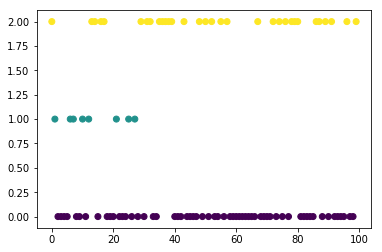

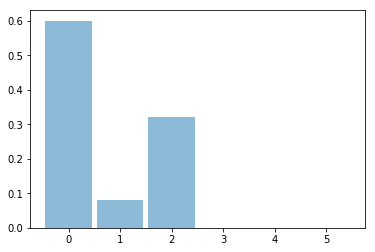

In [9]:
#Generando algunos gráficos de los resultados
labels = model.predict(X)
plt.scatter(range(100),labels,c=labels)
show()
hist(labels,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9,density=True)
show()

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº3:Explore diversos valores en los parámetros de n_init y max_iter. ¿tienen influencia en los resultados? ¿Por qué? Describa e interprete los resultados.</p></div>

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>En lo que sigue se construye un modelo probabilista de tópicos, considerando de 1 a 9 tópicos (para comparar con Kmeans
 y el algoritmo LDA estimado con el <a href="https://drive.google.com/open?id=1AoCcmg91Y1yRwM_Ox4Nvf6PGSQ9TybpE">, método de Bayes Variacional</a>, disponible como desarrollo en <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html">sklearn-lda.</a></p> 
Previo a ello se utiliza la clase CountVectorizer y su función fit_transform que permite construir una matriz tf (DTM, Document-Term Matrix) que contiene la frecuencia de aparición de cada término del vocabulario en cada texto analizado. En la definición de la clase se especifica que:
<ol>
    <li>los términos que  aparecen sólo una vez en algún texto no serán considerados en el vocabulario (min_df=2)</li>
    <li> los términos que  aparecen en mas del 95% de los textos no serán considerados en el vocabulario (max_df=0.95)</li>
    <li> se considera adicionalmente un conjunto de stop words construido ad-hoc, posible de refinar</li>
</ol></div>

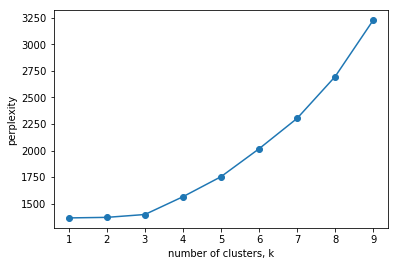

In [10]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
myStopWords=['a','e','o','u','y',' ','  ','   ','   ','    ']
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words=myStopWords,tokenizer=spacy_tokenizer, ngram_range=(1,1))
tf = tf_vectorizer.fit_transform(noticias)
diccionario= tf_vectorizer.get_feature_names()


perp = []
for k in num_k:
    #Estimación de LDA con Bayes Variacional
    lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

    lda.fit(tf)
    #Cálculo de índice de ajuste de los datos
    perp.append(lda.perplexity(tf))

plt.plot(num_k, perp, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('perplexity')
plt.xticks(num_k)
plt.show()

#print("\nTopics in LDA model:")
#print_top_words(lda, diccionario, 15)


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº4: Indage sobre la medida perplexity, ¿Cómo se interpreta el valor obtenido?
</p></div>

[[9.95274793e-01 2.38992816e-03 2.33527866e-03]
 [5.37865825e-03 2.40838148e-01 7.53783193e-01]
 [9.91468872e-01 4.53630418e-03 3.99482355e-03]
 [1.85261403e-03 9.96469255e-01 1.67813105e-03]
 [8.92476663e-04 9.98317718e-01 7.89804941e-04]
 [9.10383626e-01 8.82692122e-02 1.34716201e-03]
 [4.26051408e-03 4.30867052e-03 9.91430815e-01]
 [5.60115225e-04 5.55134117e-04 9.98884751e-01]
 [3.79739392e-03 9.92421616e-01 3.78099048e-03]
 [3.79008236e-03 9.92789910e-01 3.42000797e-03]
 [4.24916628e-03 4.21760486e-03 9.91533229e-01]
 [4.69303494e-03 9.90935676e-01 4.37128944e-03]
 [1.29626629e-03 1.32161138e-03 9.97382122e-01]
 [9.94624252e-01 2.71694256e-03 2.65880576e-03]
 [9.85113809e-01 7.74633282e-03 7.13985847e-03]
 [3.09795567e-03 9.93980594e-01 2.92145066e-03]
 [9.93271507e-01 3.28664309e-03 3.44184969e-03]
 [9.94150689e-01 3.01140847e-03 2.83790236e-03]
 [1.38878349e-03 9.97194708e-01 1.41650804e-03]
 [5.30084223e-03 9.89431592e-01 5.26756576e-03]
 [4.59166627e-03 9.90777160e-01 4.631173

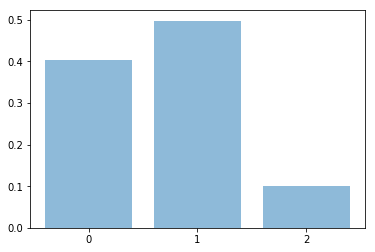

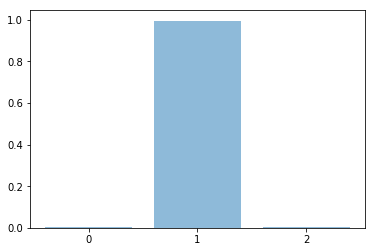

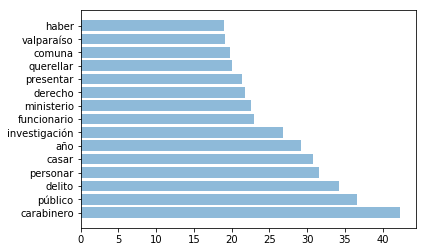

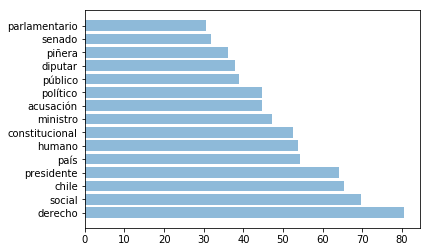

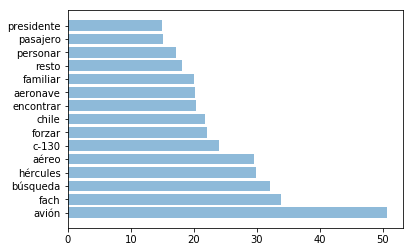

In [11]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

lda = LatentDirichletAllocation(n_components=true_k, max_iter=100,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
y=lda.fit_transform(tf)

print(y)
#distribución de tópicos en todos los documentos
dist = sum(y)/len(noticias)
print(dist)

w=np.arange(0,true_k)
print(w)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 100
plt.bar(w,height=y[98],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº5: Interprete estos gráficos. 
</p></div>

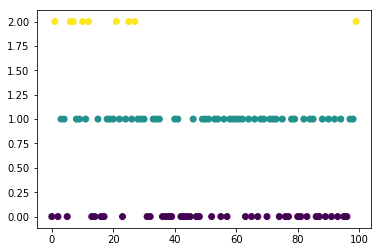

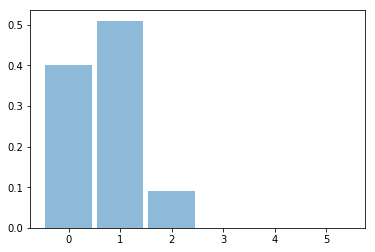

In [12]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(noticias)):
    z.append(np.argmax(y[i]))
plt.scatter(range(100),z,c=z)

#distribución de cluster de acuerdo al cálculo anterior
show()
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9,density=True)
show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº6: ¿Cómo se comparan estos resultados con los de  Kmeans?
</p></div>


<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Una nueva estimación para algoritmo LDA considerando <a href="https://drive.google.com/open?id=1oSRRvG_W0UaH0l4o9f5ClEyWuGY1j-s0"> Gibbs Sampling</a>, disponible como desarrollo en <a href="https://github.com/lda-project/lda/">lda-project.</a></p> 
</div>

In [13]:
import lda

model = lda.LDA(n_topics=true_k, n_iter=5000, alpha=0.1, eta=0.1, random_state=3)
model.fit(tf)  # model.fit_transform(X) is also available

topic_word = model.topic_word_  # model.components_ also works
n_top_words=10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(diccionario)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    


INFO:lda:n_documents: 100
INFO:lda:vocab_size: 1769
INFO:lda:n_words: 13168
INFO:lda:n_topics: 3
INFO:lda:n_iter: 5000
C:\ProgramData\Anaconda3\lib\site-packages\lda\utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -115142
INFO:lda:<10> log likelihood: -101358
INFO:lda:<20> log likelihood: -99241
INFO:lda:<30> log likelihood: -98519
INFO:lda:<40> log likelihood: -98070
INFO:lda:<50> log likelihood: -97786
INFO:lda:<60> log likelihood: -97518
INFO:lda:<70> log likelihood: -97441
INFO:lda:<80> log likelihood: -97134
INFO:lda:<90> log likelihood: -97029
INFO:lda:<100> log likelihood: -97043
INFO:lda:<110> log likelihood: -96930
INFO:lda:<120> log likelihood: -96870
INFO:lda:<130> log likelihood: -96846
INFO:lda:<140> log likelihood: -96803
INFO:lda:<150> log likelih

INFO:lda:<2030> log likelihood: -96532
INFO:lda:<2040> log likelihood: -96589
INFO:lda:<2050> log likelihood: -96543
INFO:lda:<2060> log likelihood: -96779
INFO:lda:<2070> log likelihood: -96789
INFO:lda:<2080> log likelihood: -96606
INFO:lda:<2090> log likelihood: -96727
INFO:lda:<2100> log likelihood: -96648
INFO:lda:<2110> log likelihood: -96689
INFO:lda:<2120> log likelihood: -96633
INFO:lda:<2130> log likelihood: -96739
INFO:lda:<2140> log likelihood: -96690
INFO:lda:<2150> log likelihood: -96778
INFO:lda:<2160> log likelihood: -96506
INFO:lda:<2170> log likelihood: -96775
INFO:lda:<2180> log likelihood: -96836
INFO:lda:<2190> log likelihood: -96683
INFO:lda:<2200> log likelihood: -96699
INFO:lda:<2210> log likelihood: -96769
INFO:lda:<2220> log likelihood: -96726
INFO:lda:<2230> log likelihood: -96666
INFO:lda:<2240> log likelihood: -96819
INFO:lda:<2250> log likelihood: -96639
INFO:lda:<2260> log likelihood: -96739
INFO:lda:<2270> log likelihood: -96679
INFO:lda:<2280> log likel

INFO:lda:<4140> log likelihood: -96733
INFO:lda:<4150> log likelihood: -96708
INFO:lda:<4160> log likelihood: -96791
INFO:lda:<4170> log likelihood: -96678
INFO:lda:<4180> log likelihood: -96820
INFO:lda:<4190> log likelihood: -96730
INFO:lda:<4200> log likelihood: -96767
INFO:lda:<4210> log likelihood: -96702
INFO:lda:<4220> log likelihood: -96726
INFO:lda:<4230> log likelihood: -96881
INFO:lda:<4240> log likelihood: -96649
INFO:lda:<4250> log likelihood: -96716
INFO:lda:<4260> log likelihood: -96688
INFO:lda:<4270> log likelihood: -96764
INFO:lda:<4280> log likelihood: -96661
INFO:lda:<4290> log likelihood: -96686
INFO:lda:<4300> log likelihood: -96826
INFO:lda:<4310> log likelihood: -96833
INFO:lda:<4320> log likelihood: -96802
INFO:lda:<4330> log likelihood: -96890
INFO:lda:<4340> log likelihood: -96729
INFO:lda:<4350> log likelihood: -96727
INFO:lda:<4360> log likelihood: -96849
INFO:lda:<4370> log likelihood: -96619
INFO:lda:<4380> log likelihood: -96763
INFO:lda:<4390> log likel

Topic 0: avión fach búsqueda hércules aéreo encontrar forzar c-130 personar chile
Topic 1: carabinero público año delito casar personar presentar investigación funcionario líneo
Topic 2: derecho social humano chile presidente país ministro constitucional acusación político


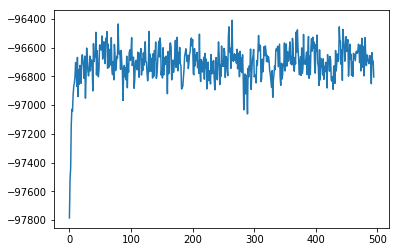

In [14]:
plt.plot(model.loglikelihoods_[5:])

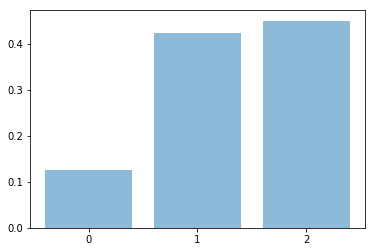

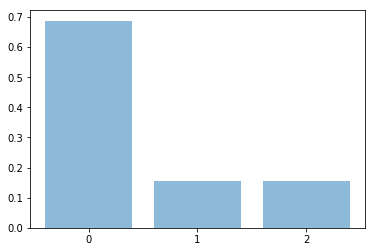

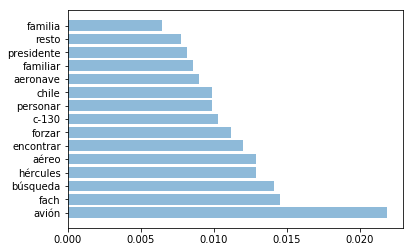

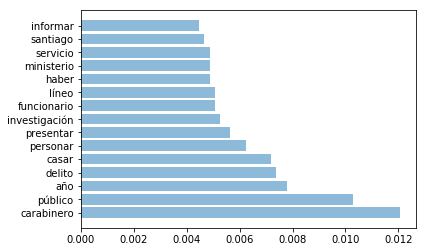

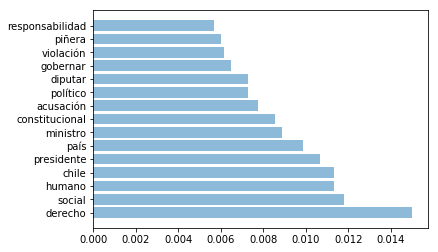

In [15]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(noticias)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=y[99],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()





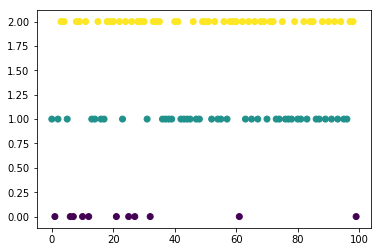

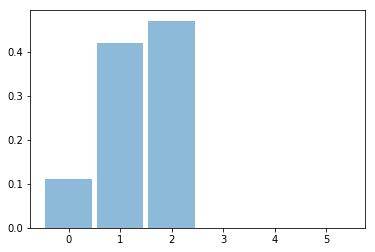

In [16]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(noticias)):
    z.append(np.argmax(y[i]))
plt.scatter(range(100),z,c=z)
show()

#distribución de cluster de acuerdo a la definición anterior
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9,density=True)
show()



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº7: ¿Cómo se comparan estos resultados con los anteriores? ¿Qué puede decir de la convergencia de la estimación en este caso?
</p></div>